# Notebook για κώδικα σχεδίασης στοιχειωδών σχημάτων 2
#### Αρχείο Jupyter notebook

In [1]:
import numpy as np 
from PIL import Image
from matplotlib import pyplot as plt 

# Δημιουργία συνάρτησης "setpixel"
def setpixel(x, y, colour, img):
    # Αυτή η συνάρτηση 'βάφει' το pixel στις συντεταγμένες (x,y) με το χρώμα 'colour'. 
    # To 'colour' πρέπει να είναι κάποιος ακέραιος στο 0..255 .
    # img είναι ο πίνακας που αντιστοιχεί στην ψηφιογραφική εικόνα (raster image) που θέλουμε να επεξεργαστούμε.
    imagedimensions = img.shape
    x1 = x + imagedimensions[0] // 2
    y1 = -y + imagedimensions[1] // 2
    if(y1 < 0 or y1 >= imagedimensions[0]):
        return(img)
    if(x1 < 0 or x1 >= imagedimensions[1]):
        return(img)
    img[y1, x1] = colour
    return(img)



In [100]:
# Συνάρτηση σχεδίασης ευθύγραμμου τμήματος με όρισμα αρχικό (x1,y1) και τελικό σημείο (x2,y2)
def draw_line_segment(x1, y1, x2, y2, colour, framebuffer):
    # Υπολογισμό των παραμέτρων της ευθείας με βάση το
    # αρχικό και το τελικό σημείο
    a = y2 - y1
    b = x1 - x2
    c = x2*y1 - x1*y2
    epsilon = 200 #/ np.sqrt(a**2+b**2)
    # Υπολογισμό ελάχιστου και μέγιστου x, y
    if(x1 < x2):
        xmin = x1
        xmax = x2
    else:
        xmin = x2
        xmax = x1
    if(y1 < y2):
        ymin = y1
        ymax = y2
    else:
        ymin = y2
        ymax = y1
    # Σχεδίαση της ευθείας με συνάρτηση f(x) = ax + by + c    
    for i in range(xmin, xmax+1):
        for j in range(ymin, ymax+1):
            value = a*i + b*j + c 
            if(np.abs(value) < epsilon):
                framebuffer = setpixel(i, j, colour, framebuffer)
    return(framebuffer)

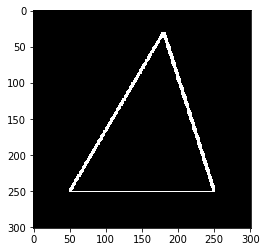

In [37]:
framebuffer = np.zeros([301, 301])
framebuffer = draw_line_segment(-100, -100, 100, -100, 255, framebuffer)
framebuffer = draw_line_segment( 100, -100,  30,  120, 255, framebuffer)
framebuffer = draw_line_segment(  30,  120,-100, -100, 255, framebuffer)
plt.imshow(framebuffer, cmap='gray')
plt.show()

In [38]:
def draw_triangle(x1, y1, x2, y2, x3, y3, colour, framebuffer):
    framebuffer = draw_line_segment(x1, y1, x2, y2, colour, framebuffer)
    framebuffer = draw_line_segment(x2, y2, x3, y3, colour, framebuffer)
    framebuffer = draw_line_segment(x3, y3, x1, y1, colour, framebuffer)
    return(framebuffer)

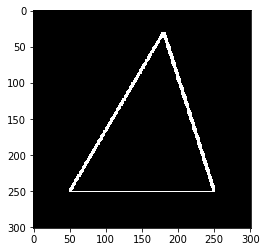

In [39]:
framebuffer = np.zeros([301, 301])
framebuffer = draw_triangle(-100, -100, 100, -100, 30, 120, 255, framebuffer)
plt.imshow(framebuffer, cmap='gray')
plt.show()

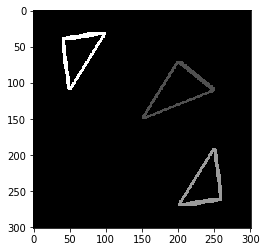

In [101]:
framebuffer = np.zeros([301, 301])
framebuffer = draw_triangle(-100 , 40 , -110 , 110, -50, 120, 255, framebuffer)
framebuffer = draw_triangle(+100, -40, +110, -110, +50, -120, 155, framebuffer)
framebuffer = draw_triangle(0, 0, 100, 40, 50, 80, 80, framebuffer)
plt.imshow(framebuffer, cmap='gray')
plt.show()

In [103]:
# Υπολογισμός bounding box ενός τριγώνου.
def compute_boundingbox_given_triangle(x1, y1, x2, y2, x3, y3):
    xlist = np.array([x1, x2, x3])
    ylist = np.array([y1, y2, y3])
    xmin = np.min(xlist)
    xmax = np.max(xlist)
    ymin = np.min(ylist)
    ymax = np.max(ylist)
    return(xmin, ymin, xmax, ymax)

bbox = compute_boundingbox_given_triangle(-100 , 40 , -110 , 110, -50, 120)
print(bbox)


(-110, 40, -50, 120)


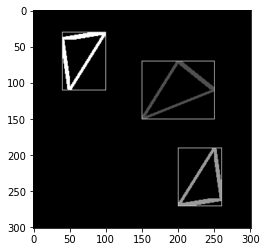

In [106]:
def draw_bounding_box(xmin, ymin, xmax, ymax, colour, framebuffer):
    # Draw line (xmin,ymin) -> (xmax,ymin)
    for i in range(xmin, xmax+1):
        framebuffer = setpixel(i, ymin, colour, framebuffer)
    # Draw line (xmin,ymin) -> (xmin,ymax)
    for j in range(ymin, ymax+1):
        framebuffer = setpixel(xmin, j, colour, framebuffer)
    # Draw line (xmax,ymin) -> (xmax,ymax)
    for j in range(ymin, ymax+1):
        framebuffer = setpixel(xmax, j, colour, framebuffer)
    # Draw line (xmin,ymax) -> (xmax,ymax)
    for i in range(xmin, xmax+1):
        framebuffer = setpixel(i, ymax, colour, framebuffer)
    return(framebuffer)

framebuffer = draw_bounding_box(bbox[0], bbox[1], bbox[2], bbox[3], 200, framebuffer)
bbox = compute_boundingbox_given_triangle(+100, -40, +110, -110, +50, -120)
framebuffer = draw_bounding_box(bbox[0], bbox[1], bbox[2], bbox[3], 200, framebuffer)
bbox = compute_boundingbox_given_triangle(0, 0, 100, 40, 50, 80)
framebuffer = draw_bounding_box(bbox[0], bbox[1], bbox[2], bbox[3], 200, framebuffer)
plt.imshow(framebuffer, cmap='gray', interpolation='bilinear')
plt.show()